In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('D:\下载\cookie_cats.csv')
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


In [4]:
df.groupby('version').count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


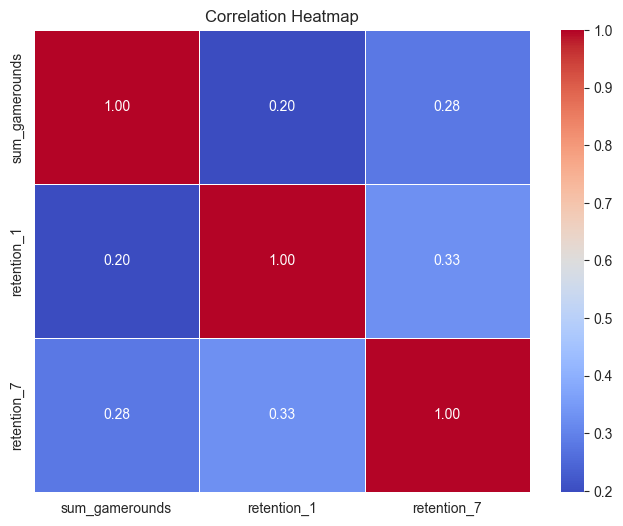

In [5]:
correlation_matrix = df[['sum_gamerounds', 'retention_1', 'retention_7']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [6]:
retention1_old = df[df.version=='gate_30'].retention_1.sum()
retention1_new = df[df.version=='gate_40'].retention_1.sum()
n_old1 = len(df[df.version=='gate_30'].retention_1)
n_new1= len(df[df.version=='gate_40'].retention_1)
retention1_old, retention1_new, n_old1, n_new1

(20034, 20119, 44700, 45489)

In [7]:
retention1_dic = {'Views':{'Control':n_old1,'Test':n_new1},'Retents': {'Control':retention1_old,'Test':retention1_new}}
retention1_table = pd.DataFrame(retention1_dic)
retention1_table['Retention %'] = retention1_table['Retents'] / retention1_table['Views']
retention1_table['Retention %'] = retention1_table['Retention %'].apply(lambda x: str(np.round(x,3)*100)+'%')
retention1_table

,Views,Retents,Retention %
Control,44700,20034,44.800000000000004%
Test,45489,20119,44.2%


In [8]:
def z_test(p1,p0,n1,n0):
    delta = p1-p0
    p = (p1*n1 + p0*n0) / (n1+n0)
    return delta / np.sqrt(p*(1-p)*(1/n1 + 1/n0))

In [9]:
p1_retention1 = retention1_new / n_new1
p0_retention1 = retention1_old / n_old1
n1_retention1 = n_new1
n0_retention1 = n_old1

In [10]:
z_value_retention1 = z_test(p1_retention1,p0_retention1,n1_retention1,n0_retention1)
z_value_retention1

-1.7840862247974725

In [11]:
!pip install scipy

In [12]:
from scipy.stats import norm
p_value_retention1 = 1- norm.cdf(z_value_retention1)
p_value_retention1 #只和0.05对比。

0.9627951723515404

In [13]:
!pip install statsmodels

In [14]:
import statsmodels.api as sm

In [15]:
z_score_retention1, p_value_retention1 = sm.stats.proportions_ztest([retention1_new, retention1_old], [n_new1, n_old1], alternative='larger')
z_score_retention1, p_value_retention1

(-1.7840862247974725, 0.9627951723515404)

In [16]:
retention7_old = df[df.version=='gate_30'].retention_7.sum()
retention7_new = df[df.version=='gate_40'].retention_7.sum()
n_old7 = len(df[df.version=='gate_30'].retention_7)
n_new7= len(df[df.version=='gate_40'].retention_7)
retention7_old, retention7_new, n_old7, n_new7

(8502, 8279, 44700, 45489)

In [17]:
retention7_dic = {'Views':{'Control':n_old7,'Test':n_new7},'Retents': {'Control':retention7_old,'Test':retention7_new}}
retention7_table = pd.DataFrame(retention7_dic)
retention7_table['Retention %'] = retention7_table['Retents'] / retention7_table['Views']
retention7_table['Retention %'] = retention7_table['Retention %'].apply(lambda x: str(np.round(x,3)*100)+'%')
retention7_table

,Views,Retents,Retention %
Control,44700,8502,19.0%
Test,45489,8279,18.2%


In [18]:
p1_retention7 = retention7_new / n_new7
p0_retention7 = retention7_old / n_old7
n1_retention7 = n_new7
n0_retention7 = n_old7

In [19]:
z_value_retention7 = z_test(p1_retention7,p0_retention7,n1_retention7,n0_retention7)
z_value_retention7

-3.164358912748191

In [20]:
p_value_retention7 = 1- norm.cdf(z_value_retention7)
p_value_retention7

0.9992228750121929

In [21]:
z_score_retention7, p_value_retention7 = sm.stats.proportions_ztest([retention7_new, retention7_old], [n_new7, n_old7], alternative='larger')
z_score_retention7, p_value_retention7

(-3.164358912748191, 0.9992228750121929)

<Axes: ylabel='Density'>

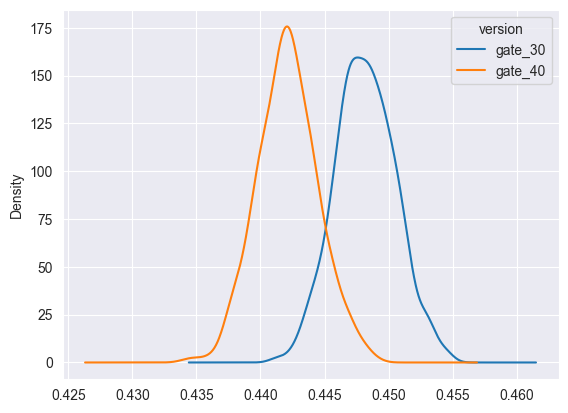

In [22]:
boot_1d = []
for i in range(1000):
    boot_mean = df.sample(frac = 1,replace = True).groupby('version')['retention_1'].mean()
    boot_1d.append(boot_mean)
boot_1d = pd.DataFrame(boot_1d)
boot_1d.plot(kind='density')

Probability that 1-day retention is greater when the gate is at level 30: 0.968


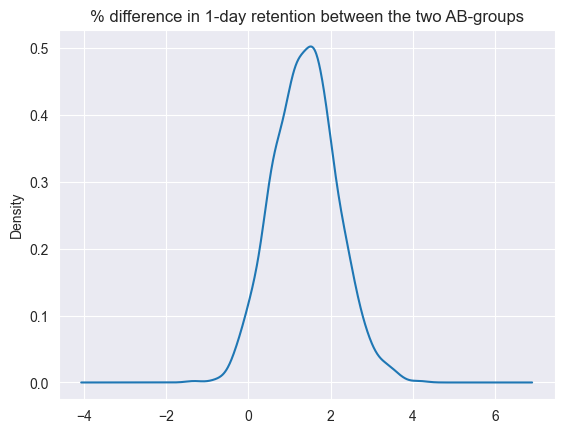

In [23]:
boot_1d['diff'] = (boot_1d.gate_30 - boot_1d.gate_40)/boot_1d.gate_40*100
ax = boot_1d['diff'].plot(kind='density')
ax.set_title('% difference in 1-day retention between the two AB-groups')
print('Probability that 1-day retention is greater when the gate is at level 30:',(boot_1d['diff'] > 0).mean())

<Axes: ylabel='Density'>

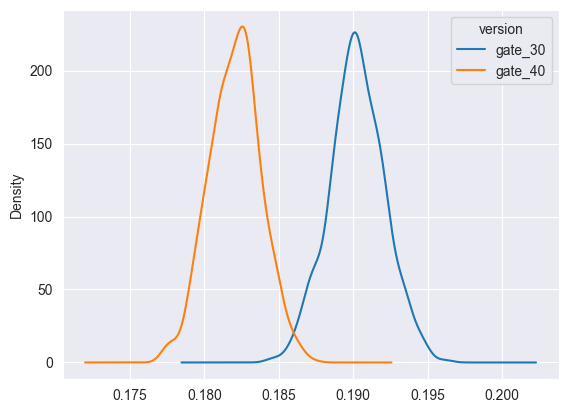

In [24]:
boot_7d = []
for i in range(1000):
    boot_mean = df.sample(frac = 1,replace = True).groupby('version')['retention_7'].mean()
    boot_7d.append(boot_mean)
boot_7d = pd.DataFrame(boot_7d)
boot_7d.plot(kind='density')

Probability that 7-day retention is greater when the gate is at level 30: 0.999


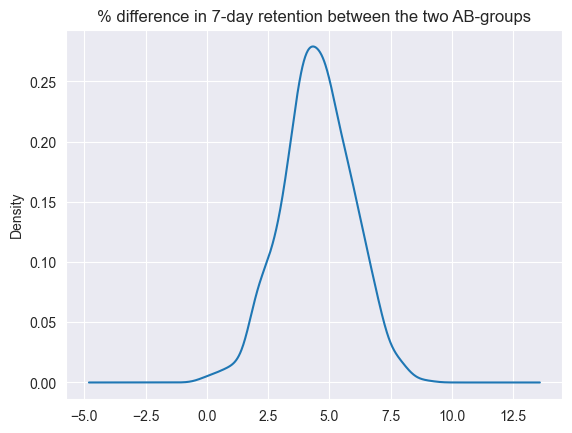

In [25]:
boot_7d['diff'] = (boot_7d.gate_30 - boot_7d.gate_40)/boot_7d.gate_40*100
ax = boot_7d['diff'].plot(kind='density')
ax.set_title('% difference in 7-day retention between the two AB-groups')
print('Probability that 7-day retention is greater when the gate is at level 30:',(boot_7d['diff'] > 0).mean())